In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [84]:
%matplotlib inline

In [85]:
df_life = pd.read_csv(r'/Users/brittanyfreese/Documents/Career Foundry/Life Expectancy/lifedata.csv', index_col = False)

In [86]:
df_lifedrop = df_life.drop(columns=['Country', 'Status'])

In [87]:
df_lifedrop.dropna()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [88]:
df_lifedrop.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [89]:
np.any(np.isnan(df_lifedrop))

True

In [90]:
np.all(np.isfinite(df_lifedrop))

False

In [91]:
df_lifedrop.replace([np.inf, -np.inf], np.nan, inplace=True)

In [92]:
df_lifedrop.fillna(999, inplace=True)

In [93]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [94]:
score = [kmeans[i].fit(df_lifedrop).score(df_lifedrop) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8.588358458636221e+18,
 -1.7177535362057802e+18,
 -5.071188028060273e+17,
 -2.1364118489316896e+17,
 -1.4786288625654973e+17,
 -9.70438942360436e+16,
 -6.903292928101333e+16,
 -5.278632793882645e+16,
 -3.690464210403753e+16]

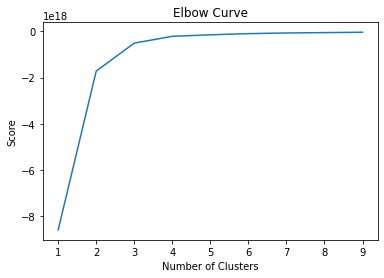

In [95]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The graph jumps rapidly from two to three on the x-axis, then rises only slightly after three. This means that the optimal number of clusters is 3.

In [96]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [97]:
# Fit the k-means object to the data.

kmeans.fit(df_lifedrop)

/Users/brittanyfreese/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [98]:
df_lifedrop['clusters'] = kmeans.fit_predict(df_lifedrop)

/Users/brittanyfreese/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [99]:
df_lifedrop.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,clusters
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [100]:
df_lifedrop['clusters'].value_counts()

0    2863
2      70
1       5
Name: clusters, dtype: int64

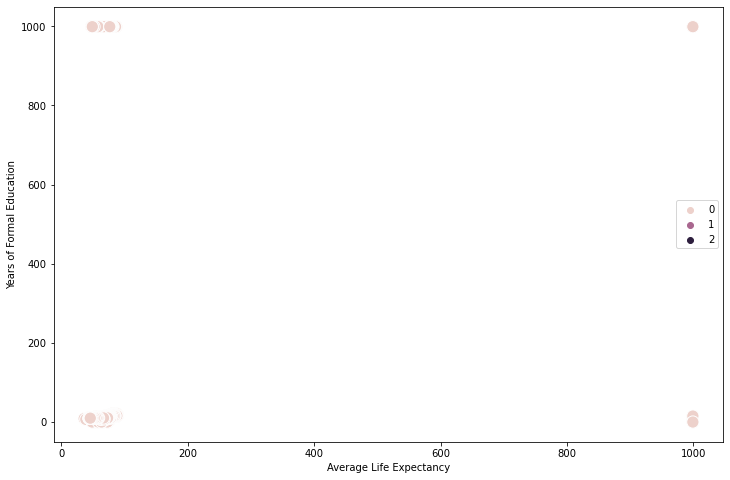

In [104]:
# Plot the clusters for the "Life Expectancy" and "Schooling" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_lifedrop['Life expectancy '], y=df_lifedrop['Schooling'], hue=kmeans.labels_, s=150) 

ax.grid(False) 
plt.xlabel('Average Life Expectancy') # Label x-axis.
plt.ylabel('Years of Formal Education') # Label y-axis.
plt.show()

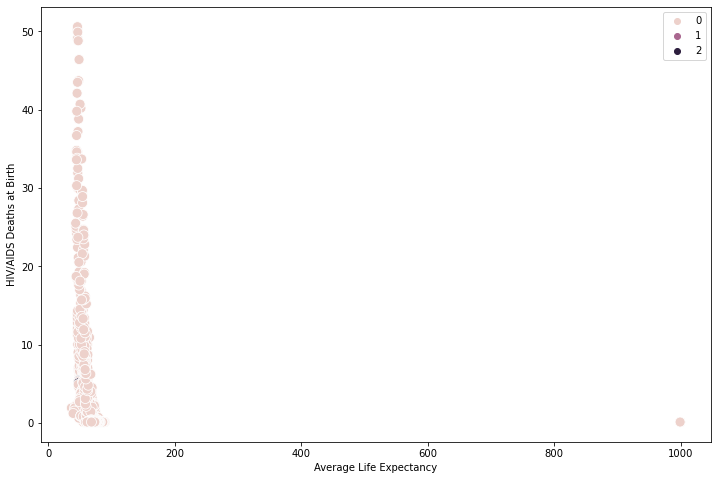

In [105]:
# Plot the clusters for the "Life Expectancy" and "HIV/AIDS" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_lifedrop['Life expectancy '], y=df_lifedrop[' HIV/AIDS'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Average Life Expectancy') # Label x-axis.
plt.ylabel('HIV/AIDS Deaths at Birth') # Label y-axis.
plt.show()

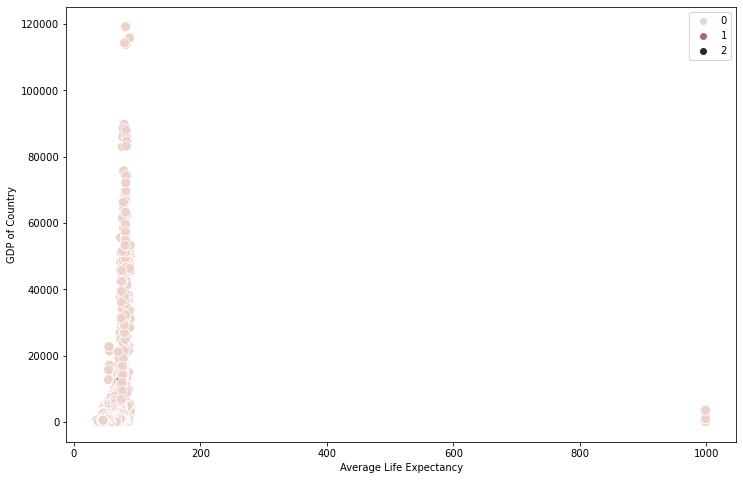

In [106]:
# Plot the clusters for the "Life Expectancy" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_lifedrop['Life expectancy '], y=df_lifedrop['GDP'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Average Life Expectancy') # Label x-axis.
plt.ylabel('GDP of Country') # Label y-axis.
plt.show()

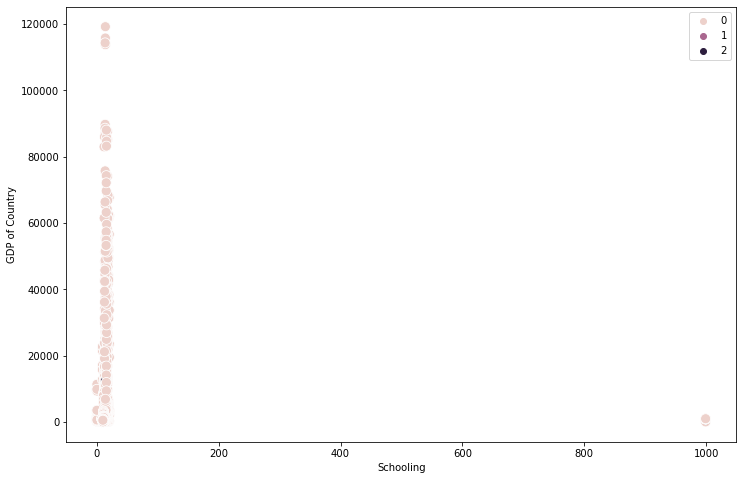

In [107]:
# Plot the clusters for the "Schooling" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_lifedrop['Schooling'], y=df_lifedrop['GDP'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Schooling') # Label x-axis.
plt.ylabel('GDP of Country') # Label y-axis.
plt.show()

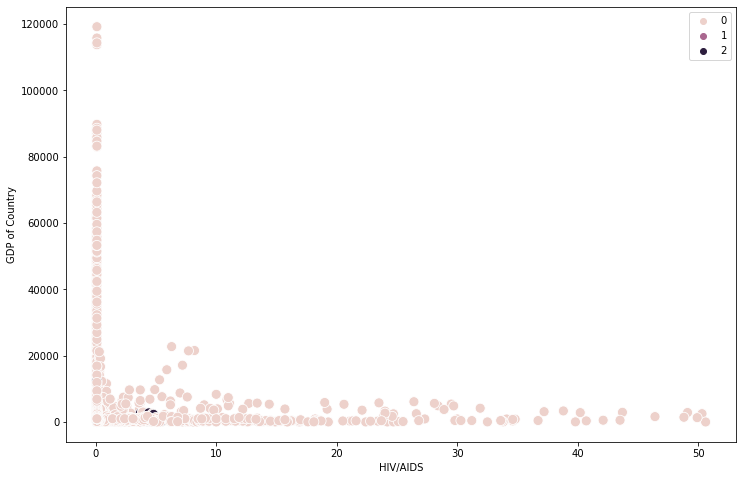

In [108]:
# Plot the clusters for the "HIV/AIDS" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_lifedrop[' HIV/AIDS'], y=df_lifedrop['GDP'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('HIV/AIDS') # Label x-axis.
plt.ylabel('GDP of Country') # Label y-axis.
plt.show()

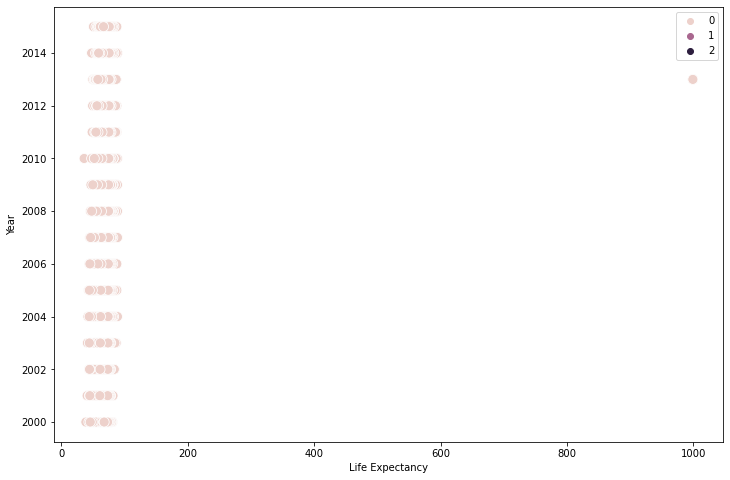

In [109]:
# Plot the clusters for the "Life Expectancy" and "Year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_lifedrop['Life expectancy '], y=df_lifedrop['Year'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Year') # Label y-axis.
plt.show()

I was not able to see any pronounced clusters in any of the variables that I tried above.

In [73]:
df_lifedrop.loc[df_lifedrop['clusters'] == 2, 'cluster'] = 'dark purple'
df_lifedrop.loc[df_lifedrop['clusters'] == 1, 'cluster'] = 'purple'
df_lifedrop.loc[df_lifedrop['clusters'] == 0, 'cluster'] = 'pink'

In [75]:
df_lifedrop.groupby('cluster').agg({'Life expectancy ':['mean', 'median'], 
                         'Schooling':['mean', 'median'], 
                         ' HIV/AIDS':['mean', 'median'],
                          'GDP':['mean', 'median']})

Life expectancy          Schooling         HIV/AIDS         \
                        mean median       mean median      mean median   
cluster                                                                  
dark purple        67.652174   67.7  11.456522   11.6  0.782609    0.1   
pink               72.516131   72.2  68.183205   12.5  1.767772    0.1   
purple             65.280000   64.8   9.960000    9.7  0.280000    0.3   

                     GDP               
                    mean       median  
cluster                                
dark purple  4890.396471  1446.985410  
pink         6543.294885  1160.026011  
purple        636.536468   621.318377

The clusters in my particular data set do not seem to be as useful as in the examples in the practie exercise.  There are useful conclusions to take away from the scatterplots themselves.
There is a relationship between the GDP and number of HIV/AIDS related deaths at birth.  
